In [1]:
import cv2
import os
import argparse
import matplotlib.pyplot as plt
import numpy as np
import torch
import json
import colorsys
import pandas as pd
import seaborn as sns
from random import randint
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
camry_path = 'data/training/vehicle_images/camry_binary'
minivan_path = 'data/training/vehicle_images/minivan_binary'
suv_path = 'data/training/vehicle_images/suv_binary'

In [3]:
vehicle_paths = [camry_path, minivan_path, suv_path]

In [4]:
training_images = []
labels = []

In [5]:
for path in vehicle_paths:
    for image in os.listdir(path):
        image = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)

        _, binary_image = cv2.threshold(image, 128, 1, cv2.THRESH_BINARY)  
        binary_image = cv2.resize(binary_image, (32,64))
        binary_image = binary_image.reshape(-1,1)

        training_images.append(binary_image)
        labels.append(1)
training_images = np.array(training_images)

In [6]:
blobs = np.array([np.array([randint(0,1) for _ in range(2048)]) for _ in range(len(training_images))])
for _ in blobs:
    labels.append(0)

In [7]:
labels = np.array(labels)
training_images = np.squeeze(training_images, axis=2)

In [8]:
x_train,X_test,y_train, y_test = train_test_split(np.concatenate([training_images, blobs]), labels, test_size=0.3,random_state=102)

In [9]:
model = Sequential()
model.add(Dense(2048, activation='sigmoid'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1))

In [10]:
model.compile(optimizer='rmsprop', loss='mse')

In [11]:
model.fit(x=x_train, y=y_train, epochs=30)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 35938.8945
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.2835
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.2300
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.1946
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.1361
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0306
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.2042
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0400
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0181
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.2368
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.1313
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0432
Epoch 13/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0498
Epoch 14/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0859
Epoch 15/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0313
Epoch 16/30
9/9

Found 95 files belonging to 2 classes.
Epoch 1/50


B:\ReponseTimePredictor\pythonProject2\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 550ms/step - accuracy: 0.6354 - loss: 0.2767
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.6979 - loss: 0.3021
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.6667 - loss: 0.3333
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.7292 - loss: 0.2708
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.6250 - loss: 0.3750
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.7708 - loss: 0.2292
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.6979 - loss: 0.3021
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.7083 - loss: 0.2916
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.6771 - loss: 0.3214
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.6667 - loss: 0.1995
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.3542 - loss: 0.6178
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.4479 - loss: 0.2794


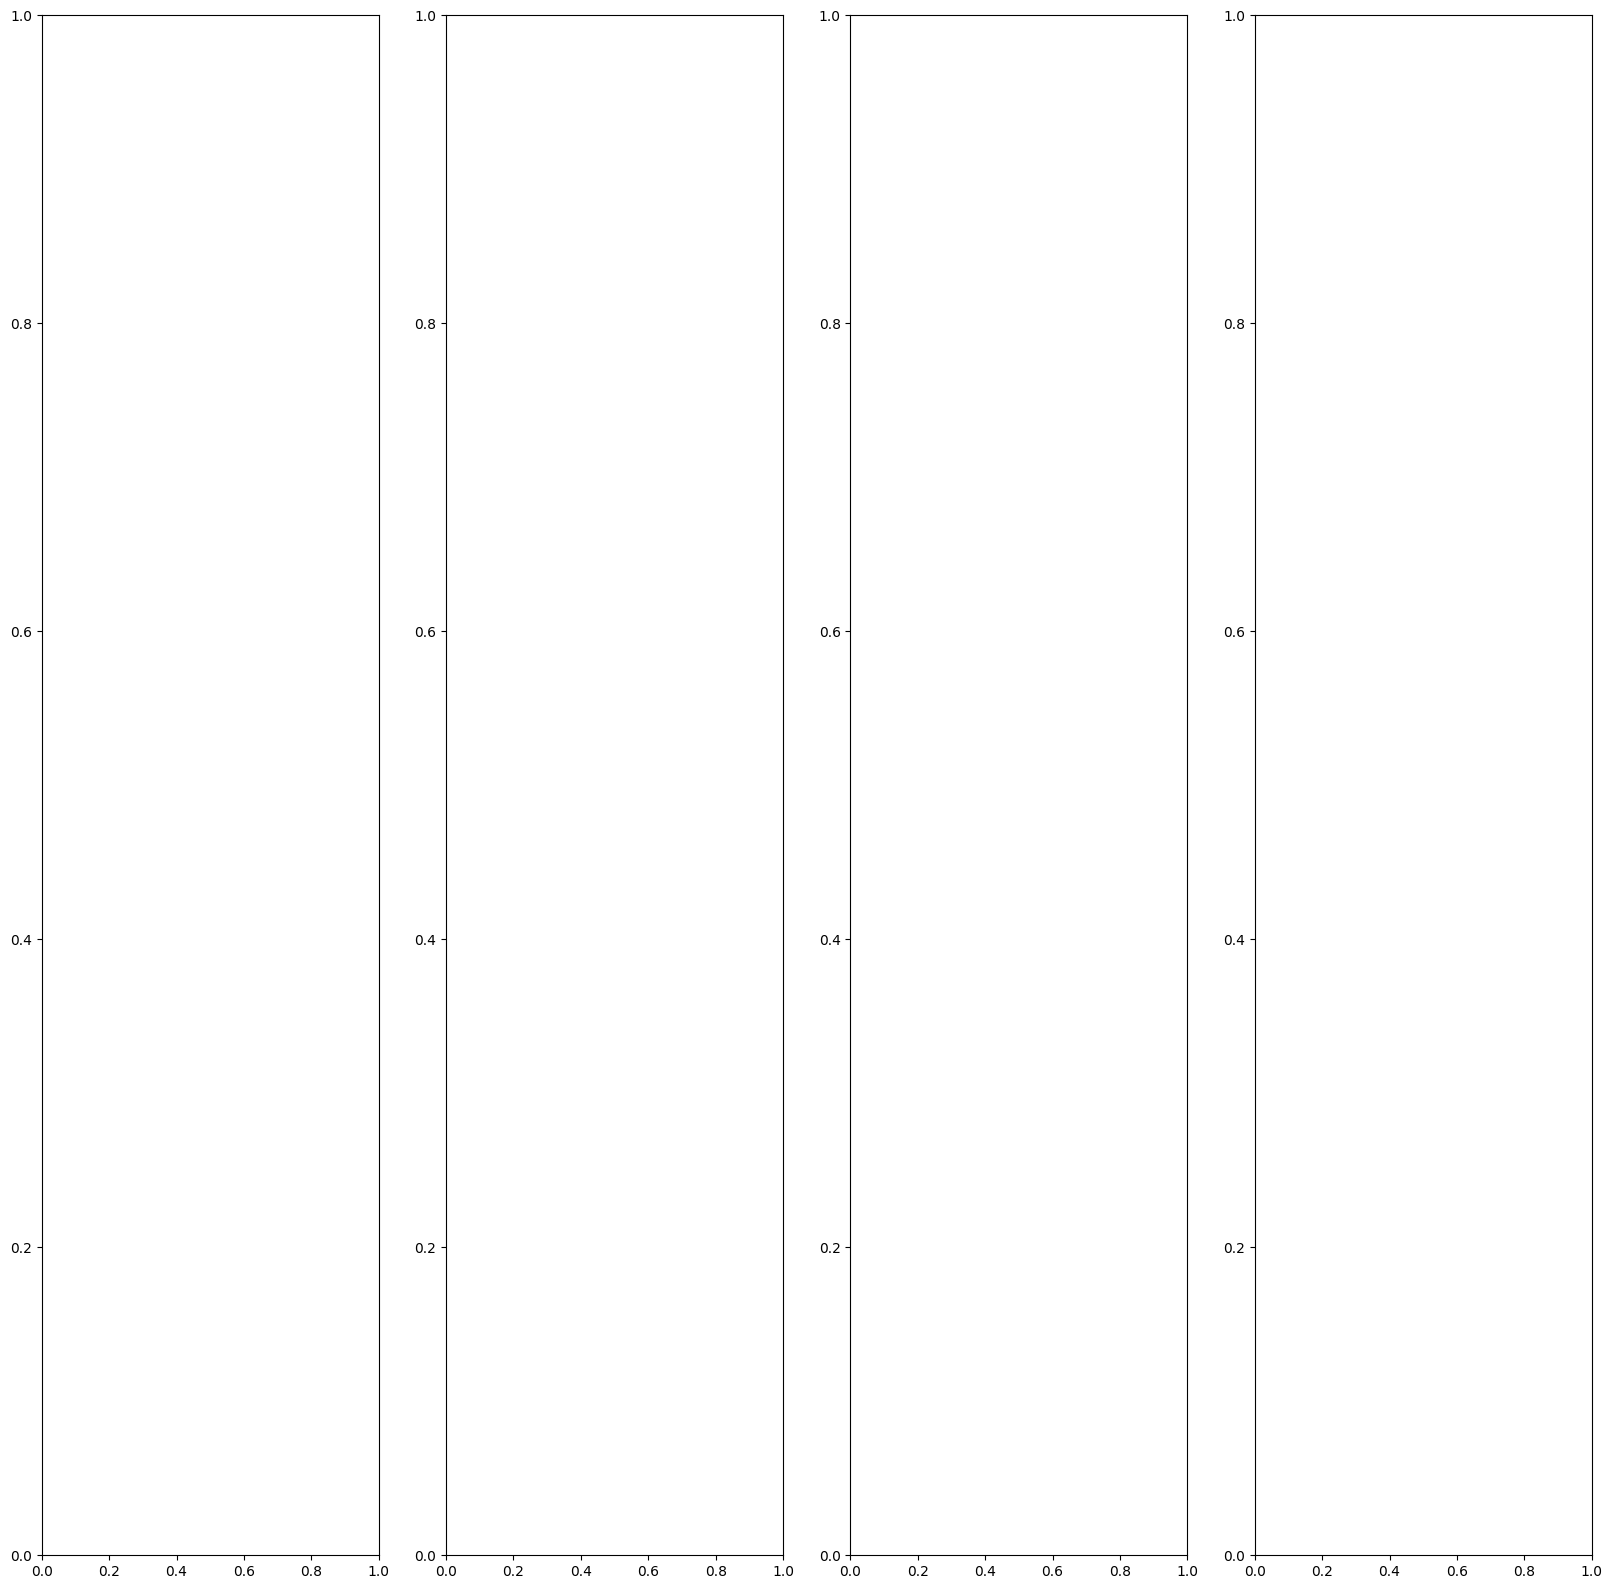

In [12]:
# Testing
data_dir = 'dataclassifier'
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
data = data.map(lambda x,y: (x/255, y))
    
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
model2 = Sequential()

# This is a model that uses Convolutional Layers. Read up on the report to learn how they work. Definitely more complex than ANN. -Sam
model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(16, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile('rmsprop', loss='mse', metrics=['accuracy'])
hist = model2.fit(train, epochs=50)


In [33]:
data = np.array([
        [103,100,105,'White'],
        [88,93,97,'Gray'],
        [124,124,124,'White'],
        [70,78,82,'Blue'],
        [76,78,84,'Gray'],
        [71,77,80,'Black'],
        [82,82,87,'Gray'],
        [61,69,73,'Black'],
        [79,81,86,'Black'],
        [68,66,70,'Red'],
        [72,73,78,'Black'],
        [71,64,69,'Red'],
        [60,61,64,'Black']
       ])

# Create the structured array

X = data[:, :3].astype(int)
y = data[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


In [51]:
video = 'vid1.mp4'
vid = cv2.VideoCapture(f'data/videos/{video}')
back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=False)
frame_width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (frame_width, frame_height))

colorsdict = {
    'Red': (70,70,200),
    'Gray':(185,185,185),
    'Black':(70,70,70),
    'White':(255,255,255)
}
print(colorsdict)
upper_bound = (153,148,148)
lower_bound = (103,101,101)
def get_dominant_color(image, contour):
    mask = np.zeros(image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    x, y, w, h = cv2.boundingRect(contour)
    img = image[y:y+h, x:x+w]
    mask2 = cv2.inRange(img, lower_bound, upper_bound)
    mask2 = cv2.bitwise_not(mask2)
    masked_img = cv2.bitwise_and(img, img, mask=mask2)
    mean_color = cv2.mean(masked_img, mask=mask2)[:3]
    RGB = [mean_color[2],mean_color[1],mean_color[0]]
    RGBColor = knn.predict([RGB])
    return [RGB,RGBColor]             
def isCar(image, contour):
    mask = np.zeros(image.shape[:2], np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    x, y, w, h = cv2.boundingRect(contour)
    img = image[y:y+h, x:x+w]
    resize = tf.image.resize(img,(256,256))
    yhat = model2.predict(np.expand_dims(resize/255,0))
    return yhat
    
while (vid.isOpened()):
    # Read a frame from the video
    ret, frame = vid.read()
    if not ret:
        break
    # Apply the background subtractor to the frame
    fg_mask = back_sub.apply(frame)
    
    # Apply a binary threshold to clean up the mask
    _, binary = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)

    # Morphological operations to remove small noise
    kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_open, iterations=2)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_close, iterations=2)

    # Find contours to identify large moving objects (cars)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a new mask to draw detected cars
    cnum = 0
    mask = np.zeros_like(binary)
    for index,contour in enumerate(contours):
        # Filter out small contours based on area
        if cv2.contourArea(contour) > 500:  # Adjust this threshold as needed
            x, y, w, h = cv2.boundingRect(contour)
            obj = []
            for i in range(y, (y+h+1)):
                for j in range(x, (x+w+1)):
                    if [j,i] in contour:
                        obj.append(1)
                    else:
                        obj.append(0)
            
            obj = np.array(obj, dtype=np.uint8)
            obj = cv2.resize(obj, (32,64))
            obj = obj.reshape(1,-1)
            
            if model.predict(obj) < 0:
                continue
            isACar = isCar(frame,contour)
            if(isACar <= 0.4):
                color = get_dominant_color(frame,contour)
                r = color[0][0]
                g = color[0][1]
                b = color[0][2]
    
                
                cnum += 1
                type = f"{color[1][0]}"
                cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
                cv2.putText(frame, f"CAR {cnum}: {type}", (x,y+-0), cv2.FONT_HERSHEY_SIMPLEX, 0.6, colorsdict[type], 2)
    cv2.putText(frame, f"{cnum} cars currently on screen.", (+30,+30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    out.write(frame)
            

{'Red': (70, 70, 200), 'Gray': (185, 185, 185), 'Black': (70, 70, 70), 'White': (255, 255, 255)}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [52]:
out.release()